In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
sns.set_style('whitegrid')

### Finding out basic data about the given dataset

In [2]:
df = pd.read_csv('problem_2/problem_2_train.csv', parse_dates=['memcreateddate','mobilepurchasedate','claimintdate','pickupStartdate'])
df.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


#### Created a new column called delta that stores the difference between days 'pickupStartdate' and 'claimintdate'

In [3]:
df['delta'] = (df.pickupStartdate - df.claimintdate).dt.days

In [4]:
df.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days,delta
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12,4
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9,10
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8,5


In [5]:
cate_cols = ['mobmake', 'hubid', 'hubpincode', 'pickuppartnerid','deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory', 'claimtype', 'custpincode', 'servicecntrid']

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[cate_cols] = df[cate_cols].apply(lambda col: le.fit_transform(col))

In [7]:
df.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days,delta
0,2851218,12,7,13,2,2,0,1,0,1085,2017-04-27,2016-12-02,2018-02-08,49,2018-02-13,5,5
1,2838330,8,10,6,2,2,0,1,0,423,2017-03-06,2017-03-05,2018-02-04,74,2018-02-08,12,4
2,2835781,8,2,2,2,2,1,1,0,16,2018-02-01,2018-01-27,2018-02-03,39,2018-02-12,9,9
3,2838589,11,2,2,2,2,1,2,0,129,2018-01-17,2018-01-31,2018-02-04,23,2018-02-14,9,10
4,2855214,12,14,1,2,2,0,1,0,369,2018-01-23,2018-01-20,2018-02-09,128,2018-02-14,8,5


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
srno,6250.0,2.946134e+06,77334.798276,2818359.0,2877225.50,2944426.5,3012237.25,3101035.0
mobmake,6250.0,1.220848e+01,5.926597,0.0,8.00,12.0,16.75,37.0
hubid,6250.0,8.990880e+00,6.006537,0.0,3.00,8.0,14.00,20.0
hubpincode,6250.0,8.519840e+00,6.149522,0.0,2.00,9.0,13.00,20.0
pickuppartnerid,6250.0,1.982560e+00,0.370780,0.0,2.00,2.0,2.00,3.0
deliverypartnerid,6250.0,2.049600e+00,0.351624,0.0,2.00,2.0,2.00,3.0
insuranceCompanyId,6250.0,2.478400e-01,0.431793,0.0,0.00,0.0,0.00,1.0
custpincodecategory,6250.0,1.432000e+00,0.787728,0.0,1.00,1.0,2.00,4.0
claimtype,6250.0,6.400000e-04,0.025292,0.0,0.00,0.0,0.00,1.0
custpincode,6250.0,7.549381e+02,571.561061,0.0,184.25,716.5,1287.00,1922.0


In [45]:
# df.columns
col_list = ['mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'servicecntrid', 'delta']

In [94]:
X = df.loc[:,col_list].to_numpy()
y = df['tat_in_days']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [95]:
corr = df.corr(method='pearson')
corr

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,servicecntrid,tat_in_days,delta
srno,1.000000,-0.019769,0.278725,-0.016398,0.110273,0.054755,0.039475,-0.048235,-0.002469,-0.009595,0.045381,-0.193610,-0.112862
mobmake,-0.019769,1.000000,-0.169564,-0.064015,-0.003661,-0.003427,-0.068907,-0.005001,0.030069,-0.026166,0.057154,0.162024,0.020612
hubid,0.278725,-0.169564,1.000000,0.036654,0.001366,-0.020546,-0.137029,0.078080,-0.005228,0.031992,0.414590,-0.111797,-0.008626
hubpincode,-0.016398,-0.064015,0.036654,1.000000,-0.062908,-0.021547,-0.084808,0.080223,0.009178,0.918392,0.140172,0.003148,-0.028949
pickuppartnerid,0.110273,-0.003661,0.001366,-0.062908,1.000000,0.238619,0.090972,-0.129255,-0.015874,-0.096325,-0.009439,-0.150543,0.001163
deliverypartnerid,0.054755,-0.003427,-0.020546,-0.021547,0.238619,1.000000,-0.013523,-0.036352,-0.039558,-0.043808,0.010189,-0.114093,0.012737
insuranceCompanyId,0.039475,-0.068907,-0.137029,-0.084808,0.090972,-0.013523,1.000000,-0.080530,0.044086,-0.089714,-0.195954,-0.033617,-0.053346
custpincodecategory,-0.048235,-0.005001,0.078080,0.080223,-0.129255,-0.036352,-0.080530,1.000000,-0.005847,0.127887,0.099103,0.162138,0.019923
claimtype,-0.002469,0.030069,-0.005228,0.009178,-0.015874,-0.039558,0.044086,-0.005847,1.000000,0.006866,0.006699,0.078633,-0.001821
custpincode,-0.009595,-0.026166,0.031992,0.918392,-0.096325,-0.043808,-0.089714,0.127887,0.006866,1.000000,0.156474,0.039493,-0.034470


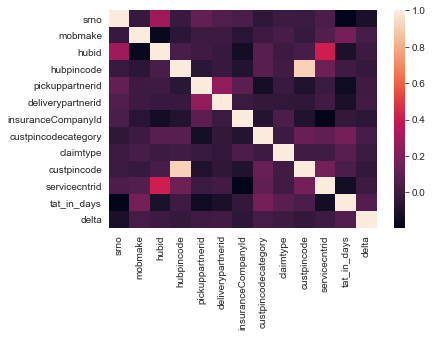

In [96]:
sns.heatmap(corr)

### Trying different regression models on the data

#### Linear Regression

In [97]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_predlr = linreg.predict(X_test)
val1 = np.sqrt(mean_squared_error(y_test, y_predlr))
print(val1)

4.982237329458286


#### Ridge Regression

In [98]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_predri = ridge.predict(X_test)
val2 = np.sqrt(mean_squared_error(y_test, y_predri))
print(val2)

4.980194712914582


#### GradientBoostingRegressor

In [100]:
grad = GradientBoostingRegressor()
grad.fit(X_train, y_train)
y_predgb = grad.predict(X_test)
val3 = np.sqrt(mean_squared_error(y_test, y_predgb))
print(val3)

4.566076717968757


#### RandomForestRegressor

In [101]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test)
val4 = np.sqrt(mean_squared_error(y_test, y_predrfr))
print(val4)

4.8391228646082425


#### KNeighborsRegressor

In [102]:
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predknr = knr.predict(X_test)
val5 = np.sqrt(mean_squared_error(y_test, y_predknr))
print(val5)

4.961548888244623
